In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py
import my_functions as mf
import numpy.linalg as ln
from mpl_toolkits.mplot3d import Axes3D
import module.metadata as metadata
import module.remnant_quantities as rq
import bisect
savefig=False
path = '../Data/147/Lev3/'
input_file1 = h5py.File(path+'Horizons.h5','r')
SXSA = input_file1['AhA.dir']['CoordCenterInertial.dat']
SXSB = input_file1['AhB.dir']['CoordCenterInertial.dat']
SXSC = input_file1['AhC.dir']['CoordCenterInertial.dat']
SPINA = input_file1['AhA.dir']['DimensionfulInertialSpin.dat']
SPINB = input_file1['AhB.dir']['DimensionfulInertialSpin.dat']
md = metadata.metadata(path)
def norm(vector):
    return np.sqrt(vector[:,0]*vector[:,0]+vector[:,1]*vector[:,1]+vector[:,2]*vector[:,2])
def dot(A,B):
    return A[:,0]*B[:,0]+A[:,1]*B[:,1]+A[:,2]*B[:,2]
def diff(A):
    A = np.transpose(A) #Transpose
    A = np.diff(A)
    A = np.transpose(A)
    return A

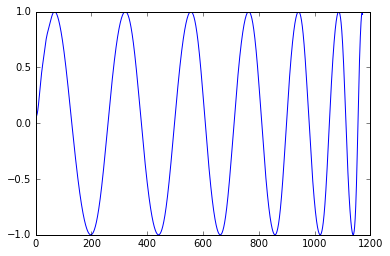

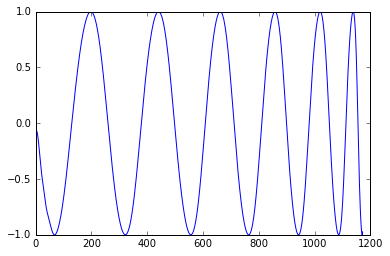

[  1.17200000e+03   1.23913288e-01   9.88235492e-01   2.25688803e-01]
(1172.20213961, array([  1.17200000e+03,   1.23913288e-01,   9.88235492e-01,
         2.25688803e-01]))
(-0.97381297967057046, -0.97381295829774117, 0.97405137256567031)
(166.85886139600075, 166.8588560097258)


In [3]:
PosA = SXSA[:,1:4]
PosB = SXSB[:,1:4]
spinA = SPINA[:,1:4]
spinB = SPINB[:,1:4]
VelA = diff(PosA)
VelB = diff(PosB)
cos1 = dot(VelA,spinA[1:])/(norm(VelA)*norm(spinA[1:]))
cos2 = dot(VelB,spinB[1:])/(norm(VelB)*norm(spinB[1:]))
infall_V= -1 * diff(PosA - PosB)

cos3 = dot(infall_V,spinA[1:])/(norm(infall_V)*norm(spinA[1:]))

plt.figure(1)
plt.plot(SXSA[1:,0],cos3)
plt.savefig('PrecessionAngle.jpg')
plt.show()
plt.figure(2)
plt.plot(SXSB[1:,0],cos2)
plt.show()
print(SXSA[bisect.bisect_left(SXSA[:,0],md.common_horizon_time) - 1])
print(md.common_horizon_time,SXSA[-1])
print(cos1[-1],cos2[-1],cos3[-1])
print(np.arccos(cos1[-1])*180/np.pi,np.arccos(cos2[-1])*180/np.pi)

In [24]:
spin1 = SPINA[-1][1:]
spin2 = SPINA[1][1:]
print(SPINB[-1][1:])
print(SPINB[1][1:])
alpha1 = rq.norm(spin1)/(md.relaxed_mass1**2)
alpha2 = rq.norm(spin2)/(md.relaxed_mass1**2)
print(alpha1,alpha2)

[ -1.18291803e-01   2.07052367e-03   8.86215717e-05]
[ -1.24999300e-01  -1.42760323e-04  -9.29376625e-05]
(0.47278144989772669, 0.49951338713842469)


In [25]:
alpha = alpha2
phi = np.arccos(cos3[-1])
phi1 = 210*np.pi/180
phi3 = 37 * np.pi/180
v13 = -15.46
v31 = 15.65
v33 = 105.90
v11 = 3681.77
v1 = v11*alpha + v13 * (alpha**3)
v3 = v13*alpha + v33 * (alpha**3)
V = v1*np.cos(phi - phi1) + v3*np.cos(3*phi-3*phi3)
print(V)

-1755.93363858


In [6]:
print(np.cos(np.pi/2))

6.12323399574e-17
